**Objetivo:**
Desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais pelo seguro de saúde.

Realizar análise descritiva do modelo para visualizar as informações existentes e identificar padrões e conhecimento dos dados.
Com isso, será possível a tomada de decisão sobre a elaboração do modelo.

In [38]:
# 1. Gerar base de dados aleatória contendo as informações de: idade, gênero, imc, filhos, fumante, região, encargos

#Geração considerando uma amostra de 15.000 clientes de seguro saúde, conforme características abaixo.

import numpy as np
import pandas as pd

# Definindo o tamanho do conjunto de dados
tamanho_dados = 15000

# Gerando dados aleatórios para idade (entre 18 e 80 anos)
idade = np.random.randint(18, 81, tamanho_dados).astype('float')

# Gerando dados aleatórios para gênero (Gênero: masculino ou feminino)
genero = np.random.choice(["Masculino", "Feminino"], tamanho_dados)

# Gerando dados aleatórios para IMC
imc = np.random.uniform(18.5, 35.0, tamanho_dados)

# Gerando dados aleatórios para filhos (entre 0 e 5)
filho = np.random.choice([0, 1, 2, 3, 4, 5], tamanho_dados, p=[0.2, 0.25, 0.35, 0.1, 0.05, 0.05])

# Gerando dados aleatórios para fumante (Fumante:Sim ou Não)
fumante = np.random.choice(["Não", "Sim"], tamanho_dados, p=[0.8, 0.2])  # Assume-se uma taxa de fumantes de 20%

# Gerando dados aleatórios para região (Regiões: Norte, Sul, Sudeste, #Centro-Oeste) com percentuais de distribuição
regiao = np.random.choice(["Norte", "Sul", "Sudeste", "Centro-Oeste"], tamanho_dados, p=[0.1, 0.3, 0.4, 0.2])

# Gerando dados aleatórios para encargos
encargos = np.random.normal(500, 130, tamanho_dados)  # Média de 500 e desvio padrão de 130

# Definindo taxas de dados faltantes para cada variável
taxa_idade_faltante = 0.1
taxa_imc_faltante = 0.05
taxa_encargos_faltante = 0.05

# Criando máscaras booleanas para os dados faltantes
dados_faltantes_idade = np.random.random(tamanho_dados) < taxa_idade_faltante
dados_faltantes_imc = np.random.random(tamanho_dados) < taxa_imc_faltante
dados_faltantes_encargos = np.random.random(tamanho_dados) < taxa_encargos_faltante

# Atribuindo valores nulos com base nas máscaras booleanas
idade[dados_faltantes_idade] = np.nan
imc[dados_faltantes_imc] = np.nan
encargos[dados_faltantes_encargos] = np.nan

# Criando um DataFrame pandas com os dados gerados
dados = pd.DataFrame({
    'Idade': idade,
    'Gênero': genero,
    'IMC': imc,
    'Filho': filho,
    'Fumante': fumante,
    'Região': regiao,
    'Encargos': encargos
})

# Exibindo os primeiros registros do DataFrame
print(dados.head())


   Idade     Gênero        IMC  Filho Fumante        Região    Encargos
0   67.0   Feminino  32.082104      2     Sim       Sudeste  443.947160
1   74.0   Feminino  28.899551      2     Não         Norte  271.514475
2   75.0  Masculino  32.812358      2     Não  Centro-Oeste  589.469300
3   41.0   Feminino  27.882311      1     Sim  Centro-Oeste  245.895832
4   46.0  Masculino  33.357687      2     Não         Norte  509.406137


In [39]:
# Exibindo os últimos registros do DataFrame
print(dados.tail())


       Idade     Gênero        IMC  Filho Fumante        Região    Encargos
14995   23.0   Feminino  23.405870      1     Não       Sudeste  655.516842
14996   79.0   Feminino  19.656107      2     Não           Sul  521.656920
14997   65.0  Masculino  24.086387      1     Não  Centro-Oeste  786.302644
14998   49.0  Masculino  32.780464      2     Não           Sul  484.137721
14999   73.0  Masculino  19.364015      1     Não           Sul  464.480167


In [40]:
#Para visualizar a dimensão dos dados
#Tamanho definido coomo 15000 linhas e 7 colunas
dados.shape

(15000, 7)

In [41]:
#Lista as informações dos dados. Pode-se verificar as colunas com valores nulos.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Idade     13487 non-null  float64
 1   Gênero    15000 non-null  object 
 2   IMC       14268 non-null  float64
 3   Filho     15000 non-null  int64  
 4   Fumante   15000 non-null  object 
 5   Região    15000 non-null  object 
 6   Encargos  14223 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 820.4+ KB


Nem todos os 15.000 registros possuem todas as informações. Existem dados faltantes para idade, imc e encargos.

In [42]:
#Para verificar o conteúdo da coluna do tipo texto
set(dados["Gênero"])

{'Feminino', 'Masculino'}

In [45]:
#Para verificar o conteúdo da coluna do tipo texto
set(dados["Fumante"])

{'Não', 'Sim'}

In [46]:
#Para verificar o conteúdo da coluna do tipo texto
set(dados["Região"])

{'Centro-Oeste', 'Norte', 'Sudeste', 'Sul'}

In [56]:
# Filtrando os dados para o gênero feminino
dados_femininos = dados[dados['Gênero'] == "Feminino"]
print(dados_femininos)

# Filtrando os dados para o gênero masculino
dados_masculinos = dados[dados['Gênero'] == "Masculino"]
print(dados_masculinos)

       Idade    Gênero        IMC  Filho Fumante        Região    Encargos
0       67.0  Feminino  32.082104      2     Sim       Sudeste  443.947160
1       74.0  Feminino  28.899551      2     Não         Norte  271.514475
3       41.0  Feminino  27.882311      1     Sim  Centro-Oeste  245.895832
5       58.0  Feminino        NaN      2     Sim       Sudeste  436.408692
6       38.0  Feminino  20.924743      0     Não           Sul  636.672814
...      ...       ...        ...    ...     ...           ...         ...
14986   67.0  Feminino  32.328481      2     Não           Sul  427.367690
14990   62.0  Feminino  32.193592      2     Não  Centro-Oeste  460.506386
14991   39.0  Feminino  27.303322      1     Não           Sul  546.274284
14995   23.0  Feminino  23.405870      1     Não       Sudeste  655.516842
14996   79.0  Feminino  19.656107      2     Não           Sul  521.656920

[7466 rows x 7 columns]
       Idade     Gênero        IMC  Filho Fumante        Região    Encargos

In [58]:
# Agrupando os dados por região e calculando estatísticas resumidas
estatisticas_por_regiao = dados_masculinos.groupby('Região').agg({
    'Idade': ['mean', 'median', 'count'],
    'IMC': 'mean',
    'Encargos': 'mean'
})

# Renomeando as colunas para maior clareza
estatisticas_por_regiao.columns = ['Idade Média', 'Idade Mediana', 'Total de Registros',  'IMC Médio',  'Encargos Médios']

# Exibindo as estatísticas por região
print(estatisticas_por_regiao)


              Idade Média  Idade Mediana  Total de Registros  IMC Médio  \
Região                                                                    
Centro-Oeste    49.005447           48.0                1285  26.887786   
Norte           48.925697           50.0                 646  26.436675   
Sudeste         48.697818           48.0                2750  26.676837   
Sul             48.860993           49.0                2115  26.795286   

              Encargos Médios  
Região                         
Centro-Oeste       499.420242  
Norte              504.436106  
Sudeste            495.328616  
Sul                495.353609  


In [43]:
#Para visualizar as principais caracteríticas descritivas dos dados
dados.describe()

,Idade,IMC,Filho,Encargos
count,13487.000000,14268.000000,15000.000000,14223.000000
mean,48.764217,26.716619,1.685800,497.809187
std,18.050513,4.729662,1.299073,129.628141
min,18.000000,18.500153,0.000000,-31.533692
25%,33.000000,22.630666,1.000000,410.504939
50%,49.000000,26.707140,2.000000,497.541883
75%,64.000000,30.846665,2.000000,585.369494
max,80.000000,34.999277,5.000000,1018.254430


array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'Filho'}>,
        <Axes: title={'center': 'Encargos'}>]], dtype=object)

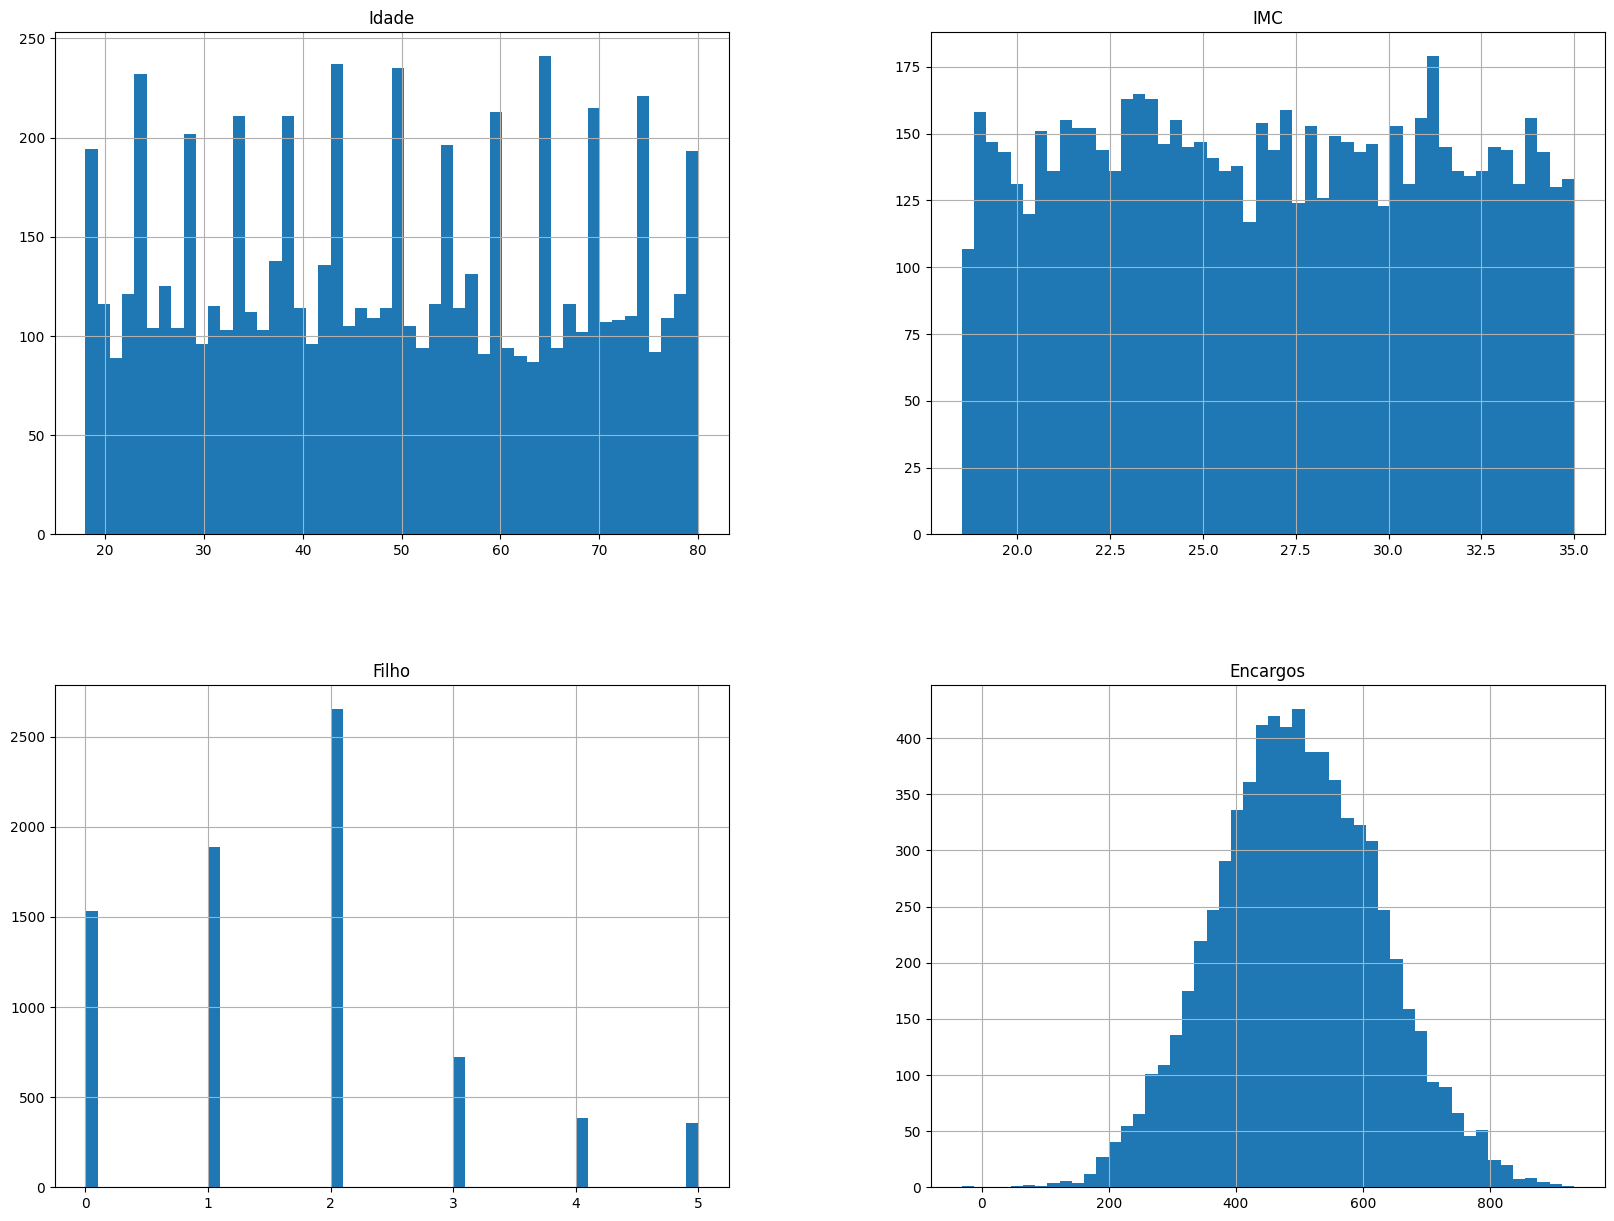

In [59]:
#Avaliando os dados do describe() no gráfico
import matplotlib.pyplot as plt
dados_masculinos.hist(bins=50, figsize=(20,15))

In [31]:
dados.groupby("Gênero").describe()
# mean = valor médio de itens do grupo
# std = desvio padrão do grupo. Pelo desvio padrão pode-se ver se estão balanceados ou não pela proximidade de valores

Idade                                                         IMC  \
            count       mean        std   min   25%   50%   75%   max   count   
Gênero                                                                          
Feminino   7606.0  49.126611  18.177990  18.0  33.0  49.0  65.0  80.0  7199.0   
Masculino  7394.0  49.079118  18.181103  18.0  33.0  49.0  65.0  80.0  7052.0   

                      ... Filho      Encargos                         \
                mean  ...   75%  max    count       mean         std   
Gênero                ...                                              
Feminino   26.722347  ...   2.0  5.0   7230.0  498.15789  129.232439   
Masculino  26.634340  ...   2.0  5.0   7019.0  503.06969  131.535586   

                                                                      
                 min         25%         50%         75%         max  
Gênero                                                                
Feminino   47.105294  411.685376  498.346625  584.731607  993.685485  
Masculino  38.915846  414.309151  501.520801  591.191770  998.859282  

[2 rows x 32 columns]

In [32]:
dados.groupby("Região").describe()

Idade                                                      \
               count       mean        std   min   25%   50%   75%   max   
Região                                                                     
Centro-Oeste  2981.0  49.259309  18.227151  18.0  34.0  49.0  65.0  80.0   
Norte         1461.0  49.145791  18.267006  18.0  33.0  50.0  65.0  80.0   
Sudeste       6007.0  49.037290  18.185120  18.0  33.0  49.0  64.0  80.0   
Sul           4551.0  49.074269  18.116066  18.0  33.0  49.0  65.0  80.0   

                 IMC             ... Filho      Encargos              \
               count       mean  ...   75%  max    count        mean   
Região                           ...                                   
Centro-Oeste  2844.0  26.717377  ...   2.0  5.0   2813.0  502.499534   
Norte         1384.0  26.790180  ...   2.0  5.0   1393.0  498.663856   
Sudeste       5712.0  26.612263  ...   2.0  5.0   5705.0  499.323559   
Sul           4311.0  26.705746  ...   2.0  5.0   4338.0  501.594479   

                                                                         \
                     std        min         25%         50%         75%   
Região                                                                    
Centro-Oeste  129.649237  53.789625  414.768956  500.233724  587.277117   
Norte         128.230898  92.267981  412.673089  496.976883  586.213244   
Sudeste       131.566921  38.915846  410.282829  500.493695  588.216594   
Sul           130.022241  49.950007  414.819869  499.609146  589.010715   

                          
                     max  
Região                    
Centro-Oeste  993.685485  
Norte         959.896080  
Sudeste       998.859282  
Sul           983.638169  

[4 rows x 32 columns]

<Axes: xlabel='Região', ylabel='Encargos'>

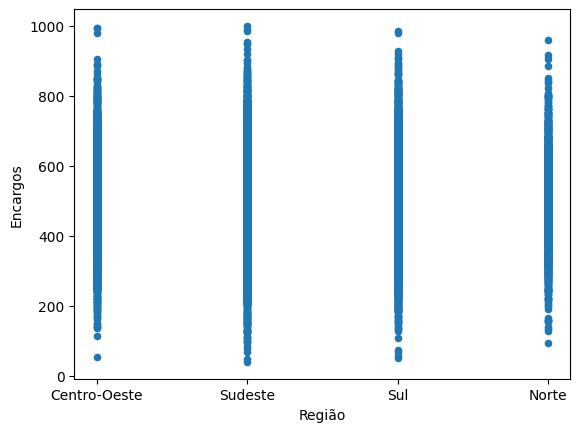

In [33]:
#Forma de visualizar melhor os dados descritivos como gráficos
dados.plot.scatter(x="Região", y="Encargos")

In [ ]:
#Realizar a limpeza de dados


Finalizada a análise exploratória, vamos separar as bases de treino e de teste.